In [ ]:
### Random Sample imputation
Aim : Random Sample imputation consists of taking random observations from the dataset and we use 
this observation to replace the nan values

when should it be used?
It assume that the data are missing completely at random(MCAR)


In [1]:
import pandas as pd
df = pd.read_csv('tictonic..csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
# checking the null values 
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
# percentage of the null values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [15]:
df['Age'].isnull().sum()

177

In [31]:
f['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)d


423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [32]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [35]:
# replace the nan values with the mean values
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    # it will have the random sample to fill the NA
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    ### pandas needs to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    
    # for the merging 
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample
    

In [36]:
median = df.Age.median()

In [37]:
median

28.0

In [38]:
impute_nan(df, 'Age', median)

In [39]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [40]:
import matplotlib.pyplot as plt 
%matplotlib inline

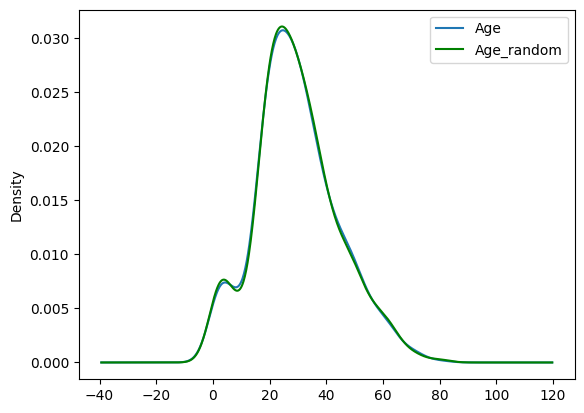

In [41]:
# now let see the distribution of the random sample values
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df.Age_random.plot(kind='kde', ax = ax, color = 'green')
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

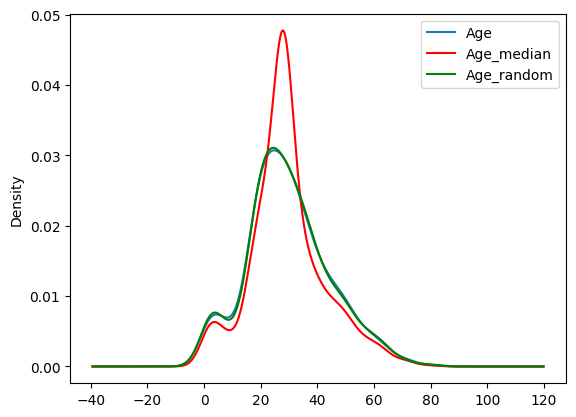

In [42]:
# now again do with mean median so varince will get distorted as show the code
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df.Age_median.plot(kind='kde', ax = ax, color = 'red')
df.Age_random.plot(kind='kde', ax = ax, color = 'green')
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

### Advantages
1. Easy to implement 
2. There i sno distortion in variance as occure in median figure 

### Disadvantages
1. Every situation randomness wont work (so we should try for the random imputation first) 


### Capturing NAN values with a new feature
it works well if the data are not missing completely at random

In [43]:
df = pd.read_csv('tictonic..csv', usecols=['Age', 'Fare', 'Survived'])
df.head() 

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [46]:
import numpy as np 
df['Age_NAN'] = np.where(df['Age'].isnull(), 1, 0) # where the values are present there will be 0 and for not present will be 1

In [45]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [54]:
df.Age.median()

29.69911764705882

In [56]:
df['Age'].fillna(df.Age.median(), inplace= True)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.000000,7.2500,0
1,1,38.000000,71.2833,0
2,1,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,0,35.000000,8.0500,0
5,0,29.699118,8.4583,1
6,0,54.000000,51.8625,0
7,0,2.000000,21.0750,0
8,1,27.000000,11.1333,0
9,1,14.000000,30.0708,0


### Advantages
1. Easy to implement 
2. Capturing the importance of missing values 

### Disadvantages 

1. Creating Additional Features(may lead  to Curse of Dimensionality)

### End of Distrubution imputation

this is again use to capture the importace of null values 
lets see how we do it  

In [87]:
df = pd.read_csv('tictonic..csv', usecols=['Age', 'Fare', 'Survived'])
df.head() 

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

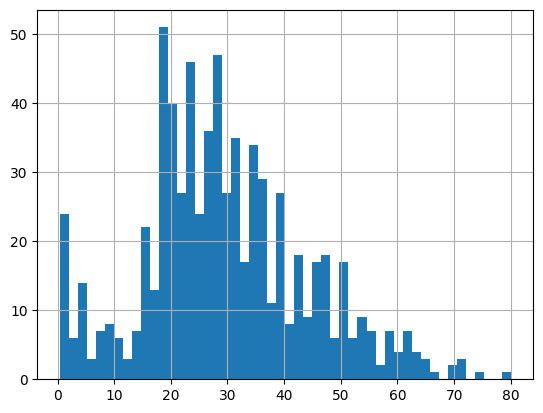

In [88]:
# trying to find the far end of the data 
df.Age.hist(bins = 50)

In [89]:
# we will take the values from the left most side and replace it with the NAN values
extreme = df.Age.mean() + 3*df.Age.std()
print(extreme)

73.27860964406094


<Axes: xlabel='Age'>

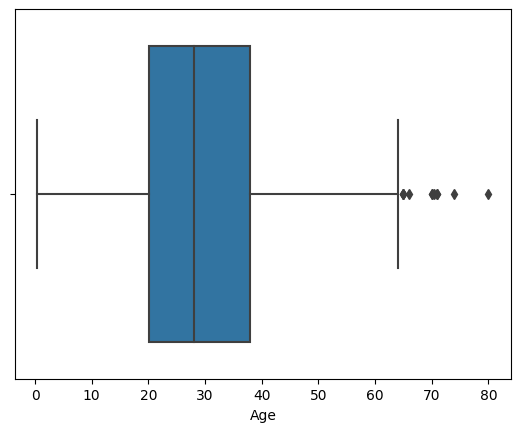

In [90]:
# check the outlier
import seaborn as sns
sns.boxplot(x = 'Age', data = df)


In [91]:
def impute_nan(df, variable , median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [92]:
impute_nan(df, 'Age',df.Age.median(),  extreme)

In [93]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

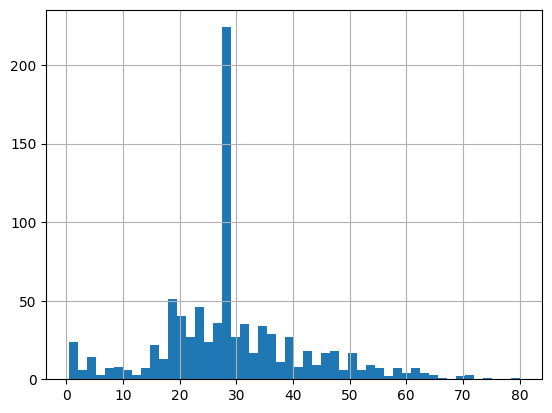

In [94]:
df['Age'].hist(bins = 50)

<Axes: >

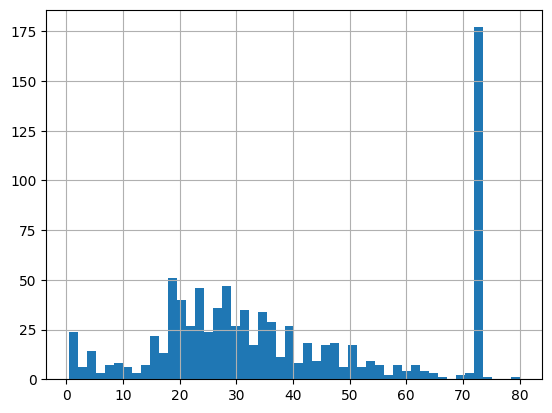

In [95]:
df['Age_end_distribution'].hist(bins = 50)

<Axes: xlabel='Age_end_distribution'>

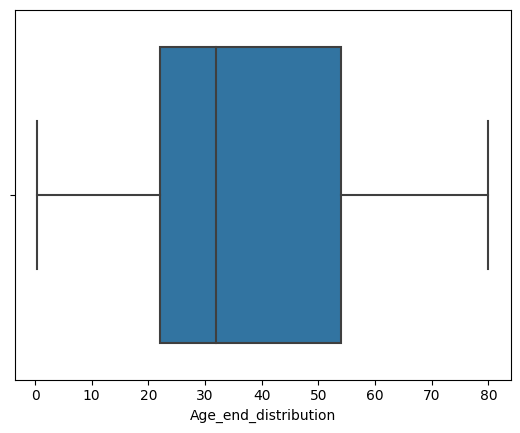

In [97]:
sns.boxplot(x = 'Age_end_distribution', data = df)

so in above diagram the outliear with were present in the above box plot are handled 
this is the end of distribution technique

### Advantages
easy to implement 
2. captures the importance of missingness if there is one 

### Disadvantages 
1. distorts the original distribution of the variables 
2. if missingness is not important , it may mask the predictive power of the original variables by distortin its distribution 
3. if the number of NA  is big, it will mask true outliers in the distribution 
4. if the number of NA is small, the replaced NA may be considered an outlier and pre processed in a subsequent
feature engineering